# EDA (Exploratory Data Analysis)

In this notebook I explore the data visually and try to pick out some insights from the data.

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
os.getcwd()

'/home/anthony/420/notebooks'

In [3]:
df = pd.read_csv('../scripts/results_summary.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4536 entries, ce2406bc88ceda4e2fde96bf96fdd2d5 to 9591fefef4086cbf060bc6afdcee4eba
Columns: 168 entries, activation_func to val_loss_39
dtypes: bool(1), float64(163), int64(1), object(3)
memory usage: 5.8+ MB


In [4]:
# Some useful masks
using_relu = df['activation_func'] == 'LeakyReLU'
using_sigmoid = df['activation_func'] == 'Sigmoid'

using_regression = df['clf_type'] == 'MLPRegressor'
using_classification = df['clf_type'] == 'MLPClassifier'

no_shuffling = df['shuffle_batches'] == False
shuffles_batch = df['shuffle_batches'] == True

In [5]:
# Gather groups of column names
train_loss_cols = df.filter(regex='train_loss_\d{2}').columns.values
train_scores_cols = df.filter(regex='train_scores_\d{2}').columns.values

val_loss_cols = df.filter(regex='val_loss_\d{2}').columns.values
val_scores_cols = df.filter(regex='val_scores_\d{2}').columns.values

In [6]:
datasets = df['dataset'].unique()

In [31]:
def plot(df, thresholds=(10, -1, 10, -1)):
    """Plot the train loss, train scores, validation loss, and validation scores of a masked dataframe.
    
    :param df: A dataframe that is masked for at least dataset.
    :param thresholds: A 4-tuple of threshold that the [train loss/train scores/validation loss/validation scores]
        must be [lower/higher/lower/higher] than to be plotted, respectively.
    """
    assert len(df['dataset'].unique()) == 1, 'You can only plot one dataset at a time!'
    
    t = thresholds
    
    # Data Wrangling    
    stacked_train_loss = pd.Series(df[df[train_loss_cols] < t[0]][train_loss_cols].values.ravel())    
    
    stacked_train_scores = pd.Series(df[df[train_scores_cols] > t[1]][train_scores_cols].values.ravel()) 
    
    stacked_val_loss = pd.Series(df[df[val_loss_cols] < t[2]][val_loss_cols].values.ravel()) 
    
    stacked_val_scores = pd.Series(df[df[val_scores_cols] > t[3]][val_scores_cols].values.ravel())
    
    # Plotting
    if len(stacked_val_loss.dropna()) > 0 or len(stacked_val_scores.dropna()) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(8, 8))
        axes = axes.ravel()
    else:
        fig, axes = plt.subplots(1, 2, figsize=(8, 4), squeeze=True)
    
    stacked_train_loss.hist(bins=100, ax=axes[0])
    axes[0].set_title('Train Loss')
    
    stacked_train_scores.hist(bins=100, ax=axes[1])
    axes[1].set_title('Train Scores')
    
    if len(stacked_val_loss.dropna()) > 0:
        stacked_val_loss.hist(bins=100, ax=axes[2])
        axes[2].set_title('Validation Loss')
    
    if len(stacked_val_scores.dropna()) > 0:
        stacked_val_scores.hist(bins=100, ax=axes[3])
        axes[3].set_title('Validation Scores')
    
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle('Plot for the Dataset %s' % df.iloc[0]['dataset'])

Metrics for Regression Tasks by Dataset


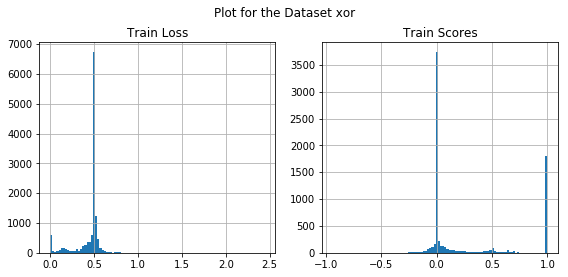

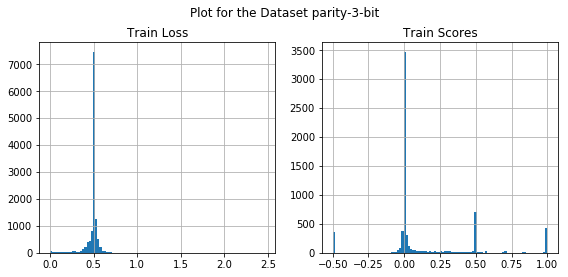

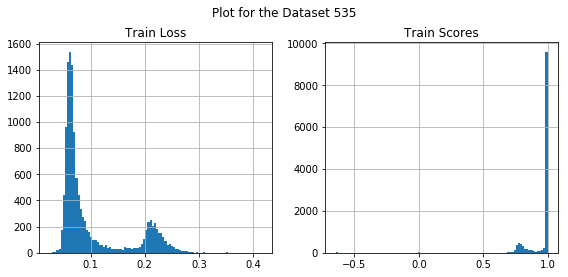

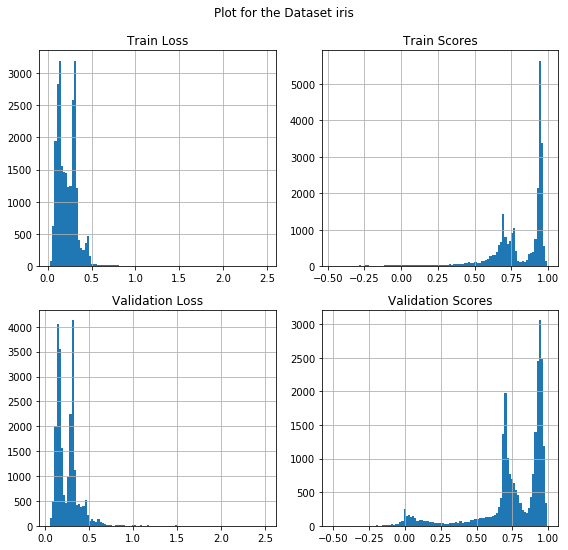

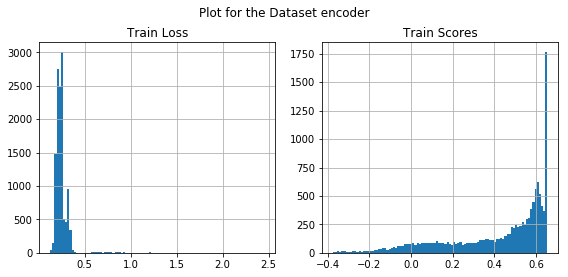

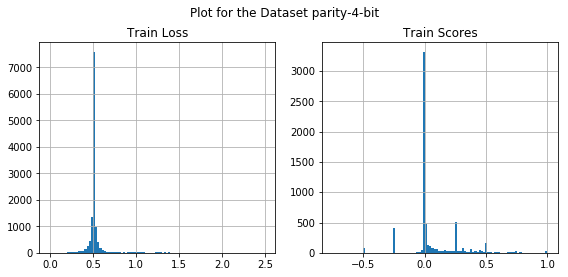

In [27]:
print('Metrics for Regression Tasks by Dataset')

for dataset in datasets:
    plot(df[using_regression & (df['dataset'] == dataset)], thresholds=(2.5, -1, 2.5, -1))

Metrics for Classification Tasks by Dataset


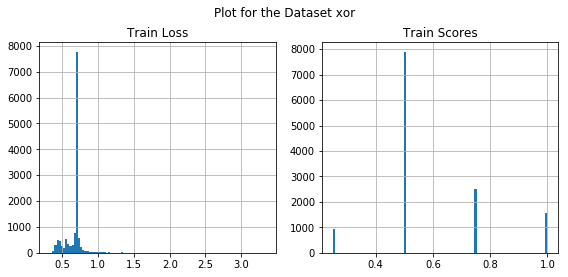

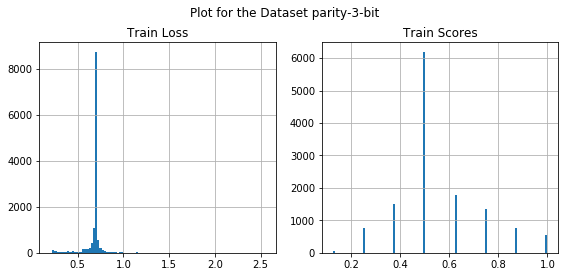

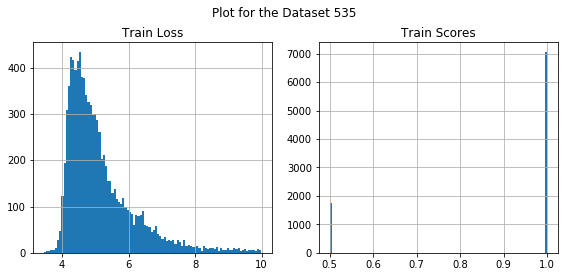

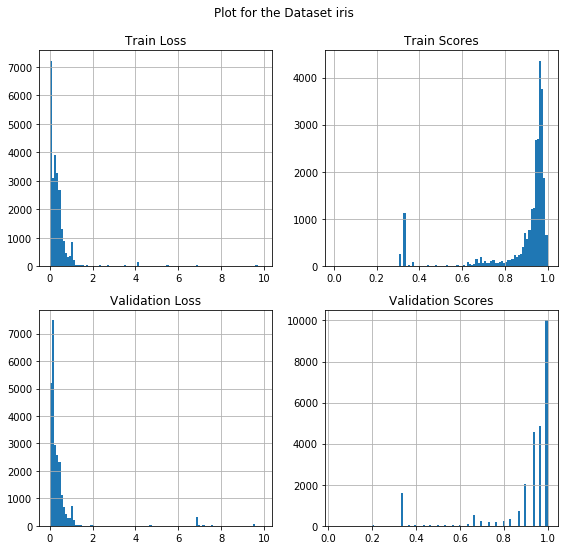

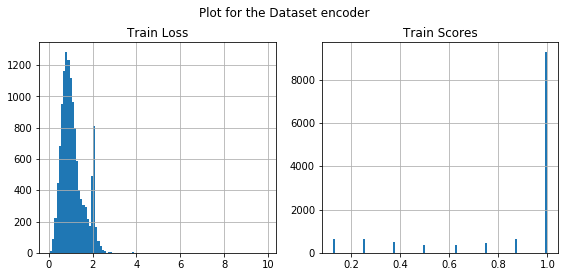

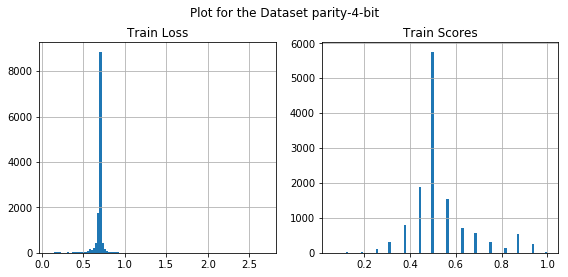

In [30]:
print('Metrics for Classification Tasks by Dataset')

for dataset in datasets:
    plot(df[using_classification & (df['dataset'] == dataset)], thresholds=(10, 0, 10, 0))